## Load data and browse data

In [2]:
# load modules and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("t.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70317 entries, 0 to 70316
Data columns (total 9 columns):
datetime             70317 non-null object
campaign_id          70317 non-null int64
campaign_spend       70317 non-null float64
campaign_budget      70317 non-null float64
matched_targeting    70317 non-null object
objective            70317 non-null object
charged              70317 non-null float64
seen_by_user         70317 non-null bool
bid                  70317 non-null float64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 3.6+ MB


In [8]:
df.describe()

campaign_id  campaign_spend  campaign_budget       charged  \
count  70317.000000    70317.000000     70317.000000  70317.000000   
mean       3.098298      191.873279       871.053954      0.000286   
std        1.975944      220.971676       511.125629      0.006735   
min        1.000000        0.000000       138.890000      0.000000   
25%        1.000000       39.910270       500.000000      0.000000   
50%        3.000000       85.342222      1000.000000      0.000000   
75%        4.000000      313.693227      1167.000000      0.000000   
max        7.000000     1211.302430      3550.000000      1.150000   

                bid  
count  70317.000000  
mean       3.376130  
std        3.147862  
min        0.050000  
25%        1.000000  
50%        1.500000  
75%        7.500000  
max        7.500000

In [9]:
df.head()

datetime  campaign_id  campaign_spend  campaign_budget  \
0  2018-04-23 07:13:30.839000            7            0.00           1075.0   
1  2018-04-23 07:14:50.757000            7            0.02           1075.0   
2  2018-04-23 07:15:01.258000            7            0.02           1075.0   
3  2018-04-23 07:15:01.540000            7            0.02           1075.0   
4  2018-04-23 07:15:20.830000            4            0.00           1167.0   

   matched_targeting     objective  charged  seen_by_user  bid  
0            ['GEO']   VIDEO_VIEWS      0.0         False  0.5  
1            ['GEO']   VIDEO_VIEWS      0.0         False  0.5  
2            ['GEO']   VIDEO_VIEWS      0.0         False  0.5  
3            ['GEO']   VIDEO_VIEWS      0.0         False  0.5  
4  ['GEO', 'GENDER']  APP_INSTALLS      0.0         False  1.0

In [10]:
# Count missing values by column
df.isnull().sum()
# no missing values

datetime             0
campaign_id          0
campaign_spend       0
campaign_budget      0
matched_targeting    0
objective            0
charged              0
seen_by_user         0
bid                  0
dtype: int64

In [11]:
df.nunique()

datetime             70317
campaign_id              7
campaign_spend       26417
campaign_budget          7
matched_targeting        7
objective                3
charged                942
seen_by_user             2
bid                      6
dtype: int64

### Explore impression, engagement

In [12]:
##

In [13]:
print(df['charged'].nunique())
df['charged_bi'] = (df[ 'charged'] > 0) 
df.groupby(df['charged_bi']).count()

942


datetime  campaign_id  campaign_spend  campaign_budget  \
charged_bi                                                           
False          69321        69321           69321            69321   
True             996          996             996              996   

            matched_targeting  objective  charged  seen_by_user    bid  \
charged_bi                                                               
False                   69321      69321    69321         69321  69321   
True                      996        996      996           996    996   

            charged_bi  
charged_bi              
False            69321  
True               996

In [14]:
df.groupby(df['seen_by_user']).count()

datetime  campaign_id  campaign_spend  campaign_budget  \
seen_by_user                                                           
False            62597        62597           62597            62597   
True              7720         7720            7720             7720   

              matched_targeting  objective  charged    bid  charged_bi  
seen_by_user                                                            
False                     62597      62597    62597  62597       62597  
True                       7720       7720     7720   7720        7720

In [15]:
# problem with impression and chargeble impression 
df['count'] = 1
pd.pivot_table(df, values = 'count', index = ['campaign_id', 'seen_by_user'],
                       columns = ['charged_bi'], aggfunc = np.sum)

charged_bi                  False  True 
campaign_id seen_by_user                
1           False         22534.0    5.0
            True           3055.0  117.0
2           False          1145.0    NaN
            True            328.0    2.0
3           False         12713.0    4.0
            True            468.0    8.0
4           False         16595.0    NaN
            True           1148.0    4.0
5           False          2049.0    1.0
            True            302.0  153.0
6           False          1373.0    NaN
            True            249.0   70.0
7           False          6176.0    2.0
            True           1186.0  630.0

In [16]:
# df_dummies = pd.get_dummies(df['charged_bi'], columns = ['charged_bi'])
# df = df.join(df_dummies)
# df.rename(columns = {True: }, inplace = True)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
Enc_ohe, Enc_label = OneHotEncoder(), LabelEncoder()
df["charged_dummy"] = Enc_label.fit_transform(df["charged_bi"])
df["seen_dummy"] = Enc_label.fit_transform(df["seen_by_user"])
df.describe()

campaign_id  campaign_spend  campaign_budget       charged  \
count  70317.000000    70317.000000     70317.000000  70317.000000   
mean       3.098298      191.873279       871.053954      0.000286   
std        1.975944      220.971676       511.125629      0.006735   
min        1.000000        0.000000       138.890000      0.000000   
25%        1.000000       39.910270       500.000000      0.000000   
50%        3.000000       85.342222      1000.000000      0.000000   
75%        4.000000      313.693227      1167.000000      0.000000   
max        7.000000     1211.302430      3550.000000      1.150000   

                bid    count  charged_dummy    seen_dummy  
count  70317.000000  70317.0   70317.000000  70317.000000  
mean       3.376130      1.0       0.014164      0.109789  
std        3.147862      0.0       0.118169      0.312628  
min        0.050000      1.0       0.000000      0.000000  
25%        1.000000      1.0       0.000000      0.000000  
50%        1.500000      1.0       0.000000      0.000000  
75%        7.500000      1.0       0.000000      0.000000  
max        7.500000      1.0       1.000000      1.000000

In [17]:
df['charged_dummy'].value_counts()

0    69321
1      996
Name: charged_dummy, dtype: int64

In [18]:
df["seen_dummy"].value_counts()

0    62597
1     7720
Name: seen_dummy, dtype: int64

## Q2

In [19]:
# calculate engagement rate for each campaign, assume chargeable impression not seen by user as 0
df[df.seen_by_user == True].groupby('campaign_id').mean()

campaign_spend  campaign_budget   charged  seen_by_user   bid  \
campaign_id                                                                  
1                255.253663           500.00  0.001307           1.0  7.50   
2                765.292224          3550.00  0.006970           1.0  1.15   
3                 30.534850          1000.00  0.000565           1.0  1.50   
4                 55.635837          1167.00  0.000543           1.0  1.00   
5                 77.781823           170.00  0.003626           1.0  0.50   
6                 62.394260           138.89  0.004204           1.0  0.05   
7                472.533941          1075.00  0.005285           1.0  0.50   

             charged_bi  count  charged_dummy  seen_dummy  
campaign_id                                                
1              0.036885    1.0       0.036885         1.0  
2              0.006061    1.0       0.006061         1.0  
3              0.016807    1.0       0.016807         1.0  
4              0.003472    1.0       0.003472         1.0  
5              0.336264    1.0       0.336264         1.0  
6              0.219436    1.0       0.219436         1.0  
7              0.346916    1.0       0.346916         1.0

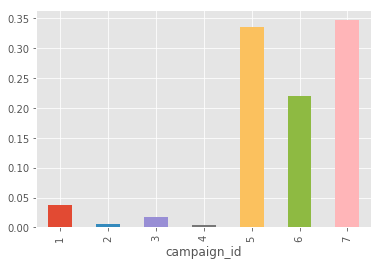

In [20]:
df[df.seen_by_user == True].groupby('campaign_id').mean()['charged_bi'].plot.bar()

Note: The variable charged_bi denotes the engagement rate(chargable impression/ total impression or seen by user). The engament rate of campaign 1 is six times higher than that of campaign 2. Engagement rates tremendaously varies acorss objectives. The video view objest has a much higher engeagment rate compared to other two objectives.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70317 entries, 0 to 70316
Data columns (total 13 columns):
datetime             70317 non-null object
campaign_id          70317 non-null int64
campaign_spend       70317 non-null float64
campaign_budget      70317 non-null float64
matched_targeting    70317 non-null object
objective            70317 non-null object
charged              70317 non-null float64
seen_by_user         70317 non-null bool
bid                  70317 non-null float64
charged_bi           70317 non-null bool
count                70317 non-null int64
charged_dummy        70317 non-null int64
seen_dummy           70317 non-null int64
dtypes: bool(2), float64(4), int64(4), object(3)
memory usage: 6.0+ MB


In [22]:
# Convert time to date type and create a date variable and hour bins
import datetime as dt
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['new_hour'] = np.where(df['hour'] >= 7, df['datetime'].dt.hour - 7, df['datetime'].dt.hour + 24 - 7)
df[df.seen_by_user == True].groupby(df['hour']).mean()

campaign_id  campaign_spend  campaign_budget   charged  seen_by_user  \
hour                                                                         
0        5.544304      377.198212       958.999620  0.004603           1.0   
1        5.311475      388.793470      1023.881680  0.002981           1.0   
2        5.057971      409.006699      1070.278297  0.003921           1.0   
3        4.296196      385.292407      1289.553505  0.001826           1.0   
4        4.236749      467.241500      1428.424099  0.006080           1.0   
5        3.880952      384.378551      1334.351905  0.005510           1.0   
6        3.275449      509.910245      1780.387246  0.000798           1.0   
7        5.227273        1.371459       997.590909  0.001747           1.0   
8        5.181818        2.737449       925.710606  0.002083           1.0   
9        1.482243       26.817262       553.042168  0.001584           1.0   
10       1.220075      191.735476       546.837562  0.001322           1.0   
11       1.522423      367.784317       593.321629  0.001366           1.0   
12       4.219731      185.715248      1070.696592  0.002073           1.0   
13       6.160839       82.718131       988.535455  0.004083           1.0   
14       5.971564      109.626446       906.884265  0.003467           1.0   
15       5.948207      142.922026       939.421514  0.003321           1.0   
16       5.600858      175.183124      1047.534163  0.002821           1.0   
17       5.946237      203.677911       924.439731  0.003370           1.0   
18       5.806818      237.214257       956.820795  0.003168           1.0   
19       5.470874      242.660222      1048.805388  0.003393           1.0   
20       5.558824      268.006661       961.982108  0.004175           1.0   
21       5.517442      269.866558       939.548547  0.003657           1.0   
22       5.305310      271.342550       991.001062  0.004875           1.0   
23       5.431472      337.589135      1003.441117  0.002883           1.0   

           bid  charged_bi  count  charged_dummy  seen_dummy  hour  new_hour  
hour                                                                          
0     0.647890    0.253165    1.0       0.253165         1.0   0.0      17.0  
1     0.685861    0.163934    1.0       0.163934         1.0   1.0      18.0  
2     0.768659    0.192029    1.0       0.192029         1.0   2.0      19.0  
3     0.991168    0.119565    1.0       0.119565         1.0   3.0      20.0  
4     0.996113    0.144876    1.0       0.144876         1.0   4.0      21.0  
5     1.130952    0.075397    1.0       0.075397         1.0   5.0      22.0  
6     1.211377    0.047904    1.0       0.047904         1.0   6.0      23.0  
7     0.750000    0.181818    1.0       0.181818         1.0   7.0       0.0  
8     0.689394    0.181818    1.0       0.181818         1.0   8.0       1.0  
9     6.762056    0.052336    1.0       0.052336         1.0   9.0       2.0  
10    7.130019    0.035536    1.0       0.035536         1.0  10.0       3.0  
11    6.679701    0.066876    1.0       0.066876         1.0  11.0       4.0  
12    2.558296    0.170404    1.0       0.170404         1.0  12.0       5.0  
13    0.568531    0.258741    1.0       0.258741         1.0  13.0       6.0  
14    0.545024    0.289100    1.0       0.289100         1.0  14.0       7.0  
15    0.571315    0.262948    1.0       0.262948         1.0  15.0       8.0  
16    0.628541    0.218884    1.0       0.218884         1.0  16.0       9.0  
17    0.585215    0.231183    1.0       0.231183         1.0  17.0      10.0  
18    0.583807    0.210227    1.0       0.210227         1.0  18.0      11.0  
19    0.650971    0.194175    1.0       0.194175         1.0  19.0      12.0  
20    0.631373    0.240196    1.0       0.240196         1.0  20.0      13.0  
21    0.648547    0.209302    1.0       0.209302         1.0  21.0      14.0  
22    0.702434    0.212389    1.0       0.212389         1.0  22.0      15.0  
23

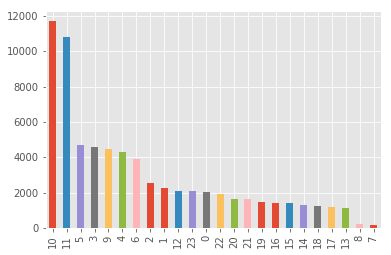

In [23]:
df['hour'].value_counts().plot.bar()

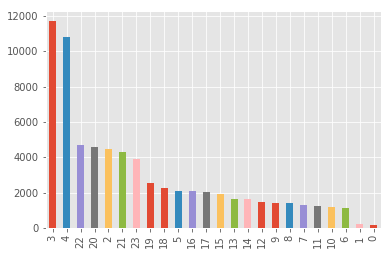

In [24]:
df['new_hour'].value_counts().plot.bar()

In [25]:
df['new_hour'].value_counts()

3     11704
4     10787
22     4707
20     4598
2      4494
21     4289
23     3930
19     2527
18     2287
5      2088
16     2070
17     2040
15     1922
13     1668
14     1636
12     1493
9      1402
8      1392
7      1298
11     1273
10     1190
6      1137
1       203
0       182
Name: new_hour, dtype: int64

In [26]:
spend_perhour = df[['new_hour', 'campaign_id', 'campaign_spend']].fillna(0).groupby(['campaign_id', 'new_hour']).min()

In [27]:
dict = {7:0, 8:1, 9:2, 10:3, 11:4, 12:5, 13:6, 14:7, 
        15:8, 16:9, 17:10, 18:11, 19:12, 20:13, 21:14, 
        22:15, 23:16, 0:17, 1:18, 2:19, 3:20, 4:21, 5:22, 6:23}

In [28]:
spend_perhour = spend_perhour.diff()

In [33]:
spend_perhour.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 127 entries, (1, 1) to (7, 23)
Data columns (total 1 columns):
spend_perhour    126 non-null float64
dtypes: float64(1)
memory usage: 1.6 KB


In [1]:
#spend_perhour['campaign_spend'] = np.where( spend_perhour['campaign_spend'] < 0 , 0, spend_perhour['campaign_spend'])

In [31]:
spend_perhour.rename(columns = {'campaign_spend' : 'spend_perhour'}, inplace = True)

In [26]:
spend_perhour.reset_index(level=0, inplace=True)

In [27]:
spend_perhour.reset_index(level=0, inplace=True)

In [28]:
spend_perhour['hour'] = (spend_perhour['new_hour'] + 7) % 24

In [29]:
spend_perhour.drop(columns = ['new_hour'], inplace = True)

In [30]:
# spend_perhour.groupby(['campaign_id', 'hour']).size()

In [31]:
spend_perhour.isnull().sum()

campaign_id      0
spend_perhour    1
hour             0
dtype: int64

In [32]:
spend_perhour.head()

campaign_id  spend_perhour  hour
0            1            NaN     8
1            1       0.010309     9
2            1      62.563392    10
3            1     270.002481    11
4            1     156.754926    12

In [33]:
spend_perhour = spend_perhour.fillna(0)
spend_perhour.isnull().sum()

campaign_id      0
spend_perhour    0
hour             0
dtype: int64

In [34]:
copyspend = spend_perhour.copy()
dfcopy = df.copy()

In [35]:
spend_perhour.set_index(['campaign_id', 'hour'], inplace = True)

In [36]:
df = pd.merge(spend_perhour, df, on = ['campaign_id', 'hour'], how = 'outer', validate = "one_to_many")
# df = df.join(spend_perhour, on = ['campaign_id', 'hour'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70317 entries, 0 to 70316
Data columns (total 16 columns):
campaign_id          70317 non-null int64
hour                 70317 non-null int64
spend_perhour        70317 non-null float64
datetime             70317 non-null datetime64[ns]
campaign_spend       70317 non-null float64
campaign_budget      70317 non-null float64
matched_targeting    70317 non-null object
objective            70317 non-null object
charged              70317 non-null float64
seen_by_user         70317 non-null bool
bid                  70317 non-null float64
charged_bi           70317 non-null bool
count                70317 non-null int64
charged_dummy        70317 non-null int64
seen_dummy           70317 non-null int64
new_hour             70317 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6), object(2)
memory usage: 8.2+ MB


In [38]:
df[df.hour == 7].head()

campaign_id  hour  spend_perhour                datetime  \
40379            4     7     -50.276246 2018-04-23 07:15:20.830   
40380            4     7     -50.276246 2018-04-23 07:16:19.730   
40381            4     7     -50.276246 2018-04-23 07:16:29.956   
40382            4     7     -50.276246 2018-04-23 07:17:05.818   
40383            4     7     -50.276246 2018-04-23 07:17:10.722   

       campaign_spend  campaign_budget  matched_targeting     objective  \
40379             0.0           1167.0  ['GEO', 'GENDER']  APP_INSTALLS   
40380             0.0           1167.0  ['GEO', 'GENDER']  APP_INSTALLS   
40381             0.0           1167.0  ['GEO', 'GENDER']  APP_INSTALLS   
40382             0.0           1167.0  ['GEO', 'GENDER']  APP_INSTALLS   
40383             0.0           1167.0  ['GEO', 'GENDER']  APP_INSTALLS   

       charged  seen_by_user  bid  charged_bi  count  charged_dummy  \
40379      0.0         False  1.0       False      1              0   
40380      0.0         False  1.0       False      1              0   
40381      0.0         False  1.0       False      1              0   
40382      0.0         False  1.0       False      1              0   
40383      0.0         False  1.0       False      1              0   

       seen_dummy  new_hour  
40379           0         0  
40380           0         0  
40381           0         0  
40382           0         0  
40383           0         0

In [39]:
df[df.seen_by_user == True].groupby(['campaign_id', 'hour']).mean() 

spend_perhour  campaign_spend  campaign_budget   charged  \
campaign_id hour                                                             
1           9          0.010309       28.965447           500.00  0.001566   
            10        62.563392      201.301023           500.00  0.001301   
            11       270.002481      411.896914           500.00  0.001197   
            12       156.754926      494.672113           500.00  0.001426   
2           0         19.174588      734.729860          3550.00  0.000000   
            1         38.901650      770.584506          3550.00  0.000000   
            2         30.072313      800.119341          3550.00  0.000000   
            3          6.867726      857.668913          3550.00  0.000000   
            4         95.251091      942.132316          3550.00  0.023000   
            5         79.400739     1006.170956          3550.00  0.031944   
            6        107.318228     1164.001526          3550.00  0.000000   
            10      -403.488807       89.264505          3550.00  0.000000   
            11        55.774923      153.573851          3550.00  0.000000   
            12        78.303600      231.851736          3550.00  0.000000   
            13        71.297808      295.818632          3550.00  0.000000   
            14        65.410249      369.863934          3550.00  0.000000   
            15        63.737669      433.752729          3550.00  0.000000   
            16        74.602517      509.227476          3550.00  0.000000   
            17        49.363485      549.257732          3550.00  0.000000   
            18        34.386334      586.528686          3550.00  0.000000   
            19        13.008531      608.300801          3550.00  0.000000   
            20        24.411773      640.509002          3550.00  0.000000   
            21        58.817399      676.636228          3550.00  0.000000   
            22        24.522336      702.439513          3550.00  0.000000   
            23         7.731764      720.136791          3550.00  0.000000   
3           2      -1084.197024        2.118857          1000.00  0.002846   
            3          6.209950       14.281377          1000.00  0.000000   
            4         15.108578       28.090433          1000.00  0.000546   
            5         14.018269       42.429483          1000.00  0.000425   
            6         14.939449       54.884085          1000.00  0.000525   
...                         ...             ...              ...       ...   
6           18         4.413787       39.090966           138.89  0.001086   
            19         5.925379       44.434775           138.89  0.006022   
            20         5.936105       51.662525           138.89  0.009383   
            21         7.777741       59.076702           138.89  0.003352   
            22         7.764860       68.072110           138.89  0.005637   
            23         8.415080       77.049113           138.89  0.004240   
7           0         62.433659      734.472010          1075.00  0.008139   
            1         73.163768      805.911203          1075.00  0.006088   
            2         78.706643      892.888313          1075.00  0.006817   
            3         77.004309      960.190031          1075.00  0.005220   
            4         64.338794     1014.652251          1075.00  0.006194   
            5         44.977239     1050.236441          1075.00  0.002887   
            6         26.709776     1068.428568          1075.00  0.004341   
            7       -136.844484        1.991451          1075.00  0.003802   
            8          3.969034        5.890016          1075.00  0.003576   
            9          5.726314       14.533029          1075.00  0.003462   
            10        10.713452       28.963873          1075.00  0.003156   
            11        16.684433       48.810987          1075.00  0.003505   
            12        24.296335       74

In [40]:
df['matched_targeting'].groupby(df['campaign_id']).value_counts()

campaign_id  matched_targeting                          
1            GEO                                            25711
2            ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']     1475
3            ['LANGUAGE', 'GEO']                            13193
4            ['GEO', 'GENDER']                              17747
5            ['AGE_BUCKET', 'GEO']                           2505
6            ['AGE_BUCKET', 'GEO']                           1689
             ['GEO', 'AGE_BUCKET']                              3
7            ['GEO']                                         7994
Name: matched_targeting, dtype: int64

In [41]:
# replace campaign targeting
df['matched_targeting'].replace('GEO', "['GEO']", inplace = True)
df['matched_targeting'].replace("['AGE_BUCKET', 'GEO']", "['GEO', 'AGE_BUCKET']", inplace = True)
df['matched_targeting'].replace("['LANGUAGE', 'GEO']", "['GEO', 'LANGUAGE']", inplace = True)

In [42]:
df['matched_targeting'].groupby(df['campaign_id']).value_counts()

campaign_id  matched_targeting                          
1            ['GEO']                                        25711
2            ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']     1475
3            ['GEO', 'LANGUAGE']                            13193
4            ['GEO', 'GENDER']                              17747
5            ['GEO', 'AGE_BUCKET']                           2505
6            ['GEO', 'AGE_BUCKET']                           1692
7            ['GEO']                                         7994
Name: matched_targeting, dtype: int64

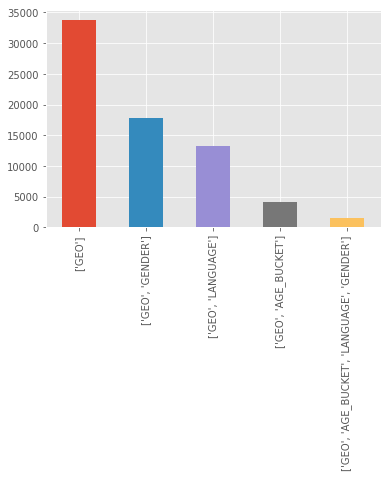

In [43]:
df['matched_targeting'].value_counts().plot.bar()

In [44]:
df['objective'].groupby(df['campaign_id']).value_counts()

campaign_id  objective     
1            WEBSITE_CLICKS    25711
2            WEBSITE_CLICKS     1475
3            APP_INSTALLS      13193
4            APP_INSTALLS      17747
5            VIDEO_VIEWS        2505
6            VIDEO_VIEWS        1692
7            VIDEO_VIEWS        7994
Name: objective, dtype: int64

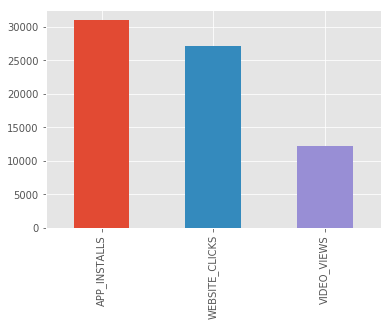

In [45]:
df['objective'].value_counts().plot.bar()

In [46]:
df['bid'].groupby(df['campaign_id']).value_counts()

campaign_id  bid 
1            7.50    25711
2            1.15     1475
3            1.50    13193
4            1.00    17747
5            0.50     2505
6            0.05     1692
7            0.50     7994
Name: bid, dtype: int64

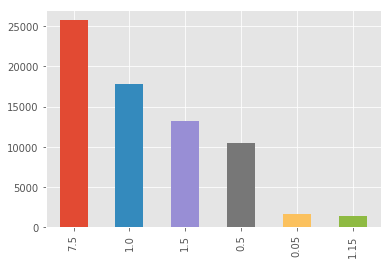

In [47]:
df['bid'].value_counts().plot.bar()

In [48]:
df['campaign_budget'].groupby(df['campaign_id']).value_counts()

campaign_id  campaign_budget
1            500.00             25711
2            3550.00             1475
3            1000.00            13193
4            1167.00            17747
5            170.00              2505
6            138.89              1692
7            1075.00             7994
Name: campaign_budget, dtype: int64

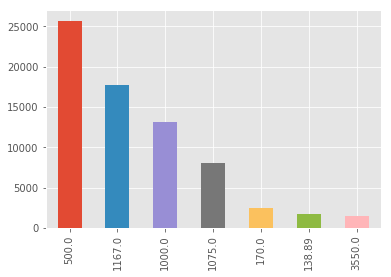

In [49]:
df['campaign_budget'].value_counts().plot.bar()

In [50]:
df['campaign_id'].value_counts()

1    25711
4    17747
3    13193
7     7994
5     2505
6     1692
2     1475
Name: campaign_id, dtype: int64

In [51]:
df[df.campaign_id == 1][df.seen_by_user == True].count()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


campaign_id          3172
hour                 3172
spend_perhour        3172
datetime             3172
campaign_spend       3172
campaign_budget      3172
matched_targeting    3172
objective            3172
charged              3172
seen_by_user         3172
bid                  3172
charged_bi           3172
count                3172
charged_dummy        3172
seen_dummy           3172
new_hour             3172
dtype: int64

In [53]:
set(df[df.campaign_id == 2]['matched_targeting'].tolist())

{"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']"}

In [54]:
set(df[df.campaign_id == 2]['campaign_budget'].tolist())

{3550.0}

## Q1

In [55]:
# convert time-series information to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])
df_timestamp = df[['datetime', 'campaign_spend','campaign_id', 'hour',
                   'seen_by_user', 'charged_dummy', 'spend_perhour']].copy()

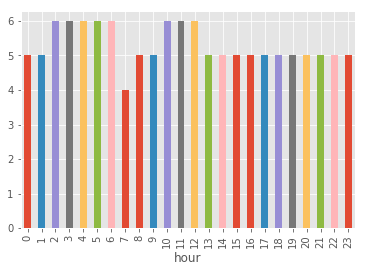

In [56]:
df_timestamp.groupby('hour')['campaign_id'].nunique().plot.bar()

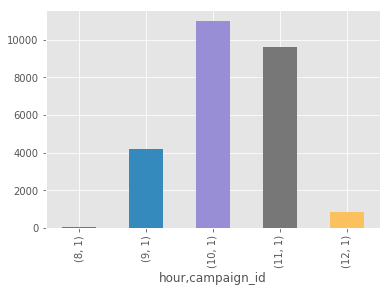

In [57]:
df_timestamp[df_timestamp['campaign_id'] == 1].groupby('hour')['campaign_id'].value_counts().plot.bar()

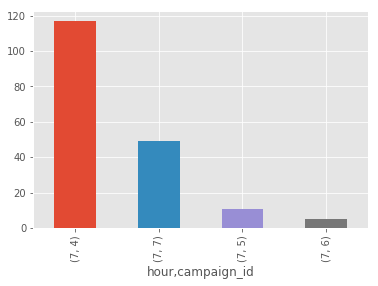

In [58]:
df_timestamp[df_timestamp['hour'] == 7].groupby('hour')['campaign_id'].value_counts().plot.bar()

In [59]:
df_timestamp = df_timestamp.set_index('datetime')

In [62]:
df_timestamp['count'] = 1

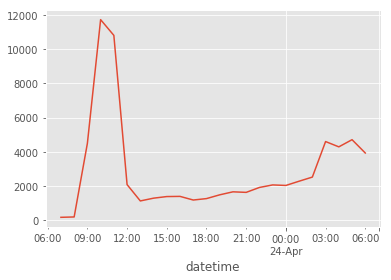

In [63]:
df_timestamp['count'].resample("H").sum().plot()

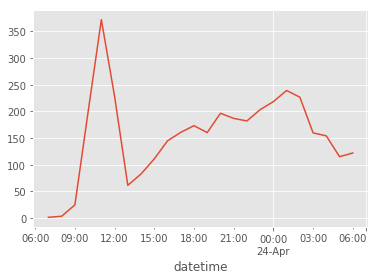

In [64]:
df_timestamp['campaign_spend'].resample("H").mean().plot()

## Q1

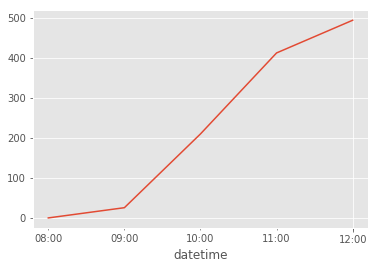

In [66]:
df_timestamp[df_timestamp.campaign_id == 1]['campaign_spend'].resample("H").mean().plot()

Note: Pacing of campaign 1 is faster than that of campaign 2. Campaign 1 spend all the budget while campaign 2 only spend a third of estimated budget. Campaign 1 only took 4 hours to spend all its budget.

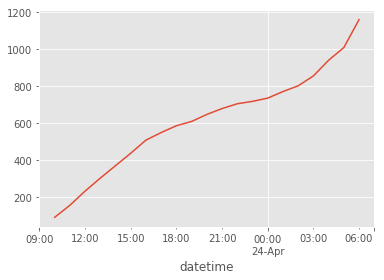

In [67]:
df_timestamp[df_timestamp.campaign_id == 2]['campaign_spend'].resample("H").mean().plot()

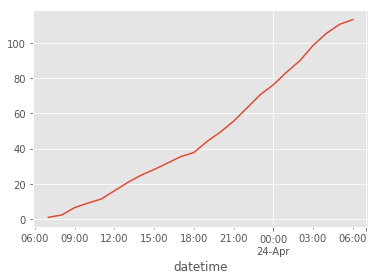

In [68]:
df_timestamp[df_timestamp.campaign_id == 4]['campaign_spend'].resample("H").mean().plot()

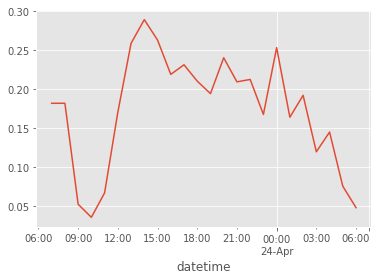

In [69]:
# check time trend of engagement rate
df_timestamp[df_timestamp.seen_by_user == True]['charged_dummy'].resample("H").mean().plot()

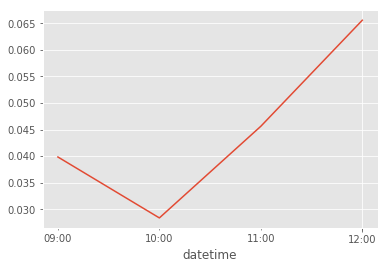

In [70]:
df_timestamp[(df_timestamp['seen_by_user'] == True) & (df_timestamp['campaign_id'] == 1)]['charged_dummy'].resample("H").mean().plot()

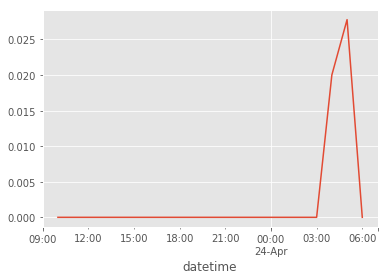

In [71]:
df_timestamp[(df_timestamp['seen_by_user'] == True) & (df_timestamp['campaign_id'] == 2)]['charged_dummy'].resample("H").mean().plot()

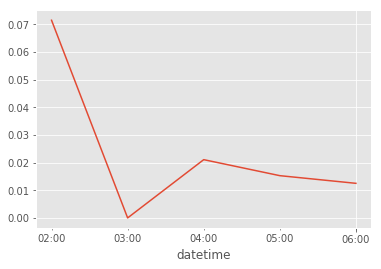

In [72]:
df_timestamp[(df_timestamp['seen_by_user'] == True) & (df_timestamp['campaign_id'] == 3)]['charged_dummy'].resample("H").mean().plot()

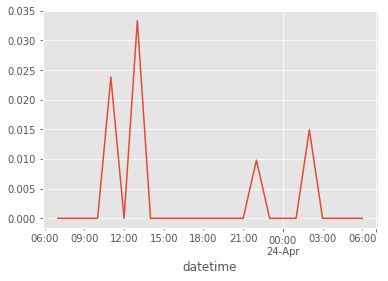

In [73]:
df_timestamp[(df_timestamp['seen_by_user'] == True) & (df_timestamp['campaign_id'] == 4)]['charged_dummy'].resample("H").mean().plot()

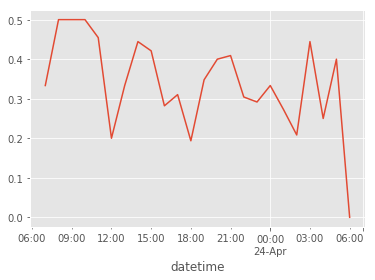

In [74]:
df_timestamp[(df_timestamp['seen_by_user'] == True) & (df_timestamp['campaign_id'] == 5)]['charged_dummy'].resample("H").mean().plot()

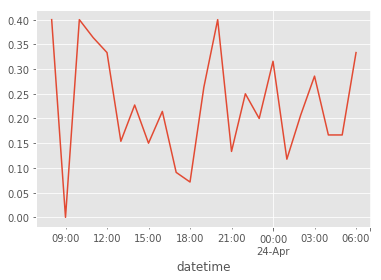

In [75]:
df_timestamp[(df_timestamp['seen_by_user'] == True) & (df_timestamp['campaign_id'] == 6)]['charged_dummy'].resample("H").mean().plot()

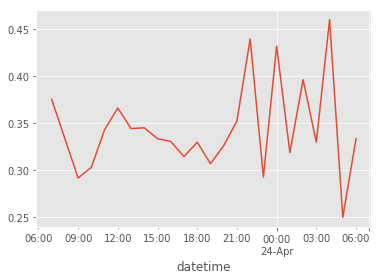

In [76]:
df_timestamp[(df_timestamp['seen_by_user'] == True) & (df_timestamp['campaign_id'] == 7)]['charged_dummy'].resample("H").mean().plot()

## Q3

In [77]:
df['count'] = 1
pd.pivot_table(df, values = 'count', index = ['bid', 'campaign_budget', 'matched_targeting', 'objective'],
                       aggfunc = np.sum)

count
bid  campaign_budget matched_targeting                           objective            
0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS      1692
0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS      2505
     1075.00         ['GEO']                                     VIDEO_VIEWS      7994
1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS    17747
1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS   1475
1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS    13193
7.50 500.00          ['GEO']                                     WEBSITE_CLICKS  25711

In [78]:
df[df.hour == 7].groupby('campaign_id')['campaign_spend'].min()

campaign_id
4    0.0
5    0.0
6    0.0
7    0.0
Name: campaign_spend, dtype: float64

In [79]:
df[df.hour == 7].groupby('campaign_id')['campaign_spend'].max()

campaign_id
4    2.399249
5    0.693181
6    0.419346
7    3.936093
Name: campaign_spend, dtype: float64

In [80]:
df.groupby('campaign_id')['campaign_spend'].max()

campaign_id
1     499.412728
2    1211.302430
3      61.081388
4     115.240681
5     169.471740
6     138.453629
7    1073.198580
Name: campaign_spend, dtype: float64

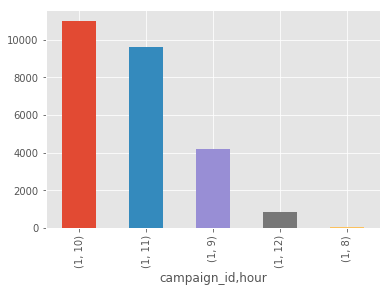

In [81]:
df[df.campaign_id == 1].groupby('campaign_id')['hour'].value_counts().plot.bar()

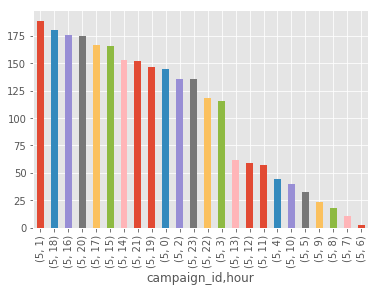

In [82]:
df[df.campaign_id == 5].groupby('campaign_id')['hour'].value_counts().plot.bar()

In [83]:
df[df.campaign_id == 2].groupby('campaign_id')['hour'].nunique()

campaign_id
2    21
Name: hour, dtype: int64

In [84]:
tmp = pd.DataFrame(df[df.campaign_id == 2]['hour'].value_counts())

In [85]:
tmp.reset_index(level = 0, inplace = True)

In [86]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
index    21 non-null int64
hour     21 non-null int64
dtypes: int64(2)
memory usage: 408.0 bytes


In [87]:
tmp.head()

index  hour
0      3   208
1      4   178
2      6   146
3      5   121
4     11    89

In [88]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
index    21 non-null int64
hour     21 non-null int64
dtypes: int64(2)
memory usage: 408.0 bytes


In [89]:
tmp.sort_values(by = ['index'])

index  hour
20      0    19
9       1    58
7       2    66
0       3   208
1       4   178
3       5   121
2       6   146
14     10    45
4      11    89
6      12    67
16     13    23
17     14    22
10     15    54
5      16    88
11     17    52
12     18    49
13     19    47
8      20    60
18     21    22
19     22    20
15     23    41

In [2]:
#tmp.plot(x = 'index', y = 'hour', marker = '.')

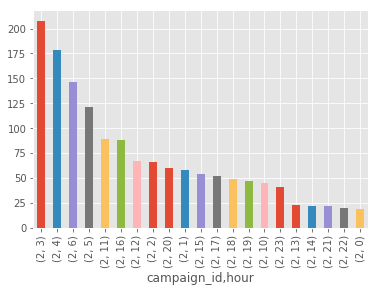

In [91]:
df[df.campaign_id == 2].groupby('campaign_id')['hour'].value_counts().plot.bar()

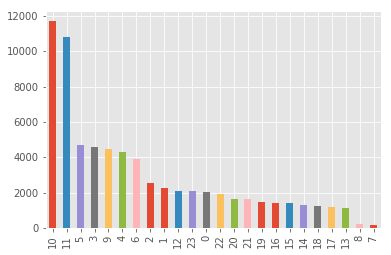

In [92]:
df['hour'].value_counts().plot.bar()

In [93]:
tmp['hour'].sum()

1475

In [94]:
df[df.campaign_id == 3].groupby('campaign_id')['hour'].nunique()

campaign_id
3    5
Name: hour, dtype: int64

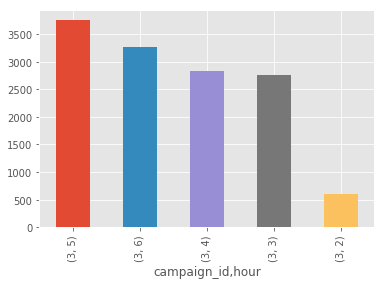

In [95]:
df[df.campaign_id == 3].groupby('campaign_id')['hour'].value_counts().plot.bar()

In [96]:
df[df.campaign_id == 4].groupby('campaign_id')['hour'].nunique()

campaign_id
4    24
Name: hour, dtype: int64

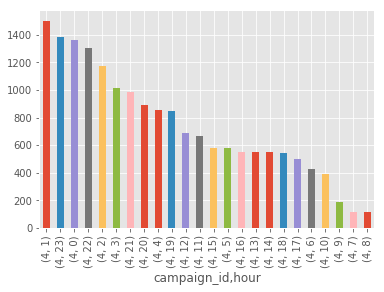

In [97]:
df[df.campaign_id == 4].groupby('campaign_id')['hour'].value_counts().plot.bar()

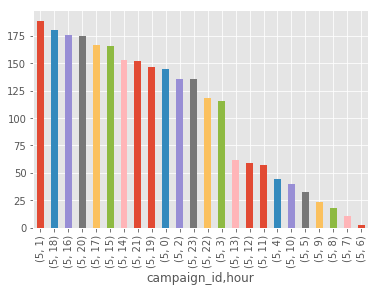

In [98]:
df[df.campaign_id == 5].groupby('campaign_id')['hour'].value_counts().plot.bar()

In [99]:
df[df.campaign_id == 5].groupby('campaign_id')['hour'].nunique()

campaign_id
5    24
Name: hour, dtype: int64

In [100]:
df[df.campaign_id == 6].groupby('campaign_id')['hour'].nunique()

campaign_id
6    24
Name: hour, dtype: int64

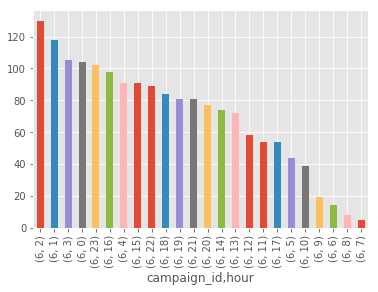

In [101]:
df[df.campaign_id == 6].groupby('campaign_id')['hour'].value_counts().plot.bar()

In [102]:
df[df.campaign_id == 7].groupby('campaign_id')['hour'].nunique()

campaign_id
7    24
Name: hour, dtype: int64

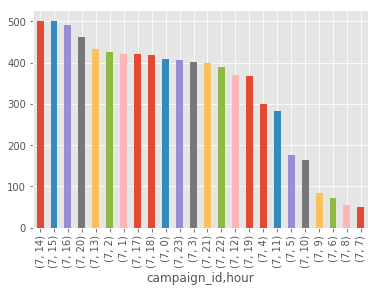

In [103]:
df[df.campaign_id == 7].groupby('campaign_id')['hour'].value_counts().plot.bar()

In [104]:
pd.pivot_table(df, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.sum)

count
campaign_id bid  campaign_budget matched_targeting                           objective            
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS  25711
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS   1475
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS    13193
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS    17747
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS      2505
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS      1692
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS      7994

In [105]:
df_seen = df[df['seen_by_user'] == True]

In [106]:
# engagement rate
pd.pivot_table(df_seen, values = 'charged_dummy', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.mean)

charged_dummy
campaign_id bid  campaign_budget matched_targeting                           objective                    
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS       0.036885
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS       0.006061
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS         0.016807
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS         0.003472
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS          0.336264
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS          0.219436
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS          0.346916

In [107]:
# number of impressions
pd.pivot_table(df_seen, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.sum)

count
campaign_id bid  campaign_budget matched_targeting                           objective            
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS   3172
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS    330
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS      476
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS     1152
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS       455
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS       319
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS      1816

In [108]:
# number of total sucessful bids
pd.pivot_table(df, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.sum)

count
campaign_id bid  campaign_budget matched_targeting                           objective            
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS  25711
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS   1475
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS    13193
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS    17747
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS      2505
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS      1692
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS      7994

In [109]:
x = pd.pivot_table(df_seen, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.sum)
y = pd.pivot_table(df, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.sum)
summary = pd.merge(x, y, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'])

In [110]:
# x = pd.pivot_table(df_seen, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
#                    aggfunc = np.sum)
# y = pd.pivot_table(df, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
#                    aggfunc = np.sum)
# summary = pd.merge(x, y, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'])
z = pd.pivot_table(df, values = 'campaign_spend', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.max)
z
# y1 = pd.pivot_table(df, values = 'charged_dummy', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
#                    aggfunc = np.sum)
# summary = pd.merge(summary, z, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'])
# summary = pd.merge(summary, y1, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'])


campaign_spend
campaign_id bid  campaign_budget matched_targeting                           objective                     
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS      499.412728
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS     1211.302430
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS         61.081388
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS        115.240681
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS         169.471740
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS         138.453629
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS        1073.198580

In [111]:
y1 = pd.pivot_table(df, values = 'charged_dummy', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'],
                   aggfunc = np.sum)

In [112]:
summary = pd.merge(summary, z, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'])

In [113]:
summary = pd.merge(summary, y1, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective'])

In [114]:
# summary.drop(columns = ['impression_rate'], inplace = True)

In [148]:
summary['seen_rate'] = summary['count_x'] / summary['count_y']
summary['imp_perd'] = summary['count_x']/summary['campaign_spend']
summary['cpi'] = summary['campaign_spend'] / summary['count_x']
summary['cpo'] = summary['campaign_spend'] / summary['charged_dummy']
summary['charge_perd'] = summary['charged_dummy']/summary['campaign_spend']
summary['egg_rate'] = summary['charged_dummy'] / summary['count_x']

In [116]:
# summary['char_perd'] = summary['charged_dummy']/summary['campaign_spend']

### REAL Q3

In [149]:
summary

count_x  \
campaign_id bid  campaign_budget matched_targeting                           objective                 
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS     3172   
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS      330   
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS        476   
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS       1152   
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS         455   
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS         319   
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS        1816   

                                                                                             count_y  \
campaign_id bid  campaign_budget matched_targeting                           objective                 
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS    25711   
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS     1475   
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS      13193   
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS      17747   
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS        2505   
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS        1692   
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS        7994   

                                                                                             campaign_spend  \
campaign_id bid  campaign_budget matched_targeting                           objective                        
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS      499.412728   
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS     1211.302430   
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS         61.081388   
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS        115.240681   
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS         169.471740   
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS         138.453629   
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS        1073.198580   

                                                                                             charged_dummy  \
campaign_id bid  campaign_budget matched_targeting                           objective                       
1           7.50 500.00          ['GEO']                                     WEBSITE_CLICKS            122   
2           1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS              2   
3           1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS               12   
4           1.00 1167.00         ['GEO', 'GENDER']                           APP_INSTALLS                4   
5           0.50 170.00          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS               154   
6           0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS                70   
7           0.50 1075.00         ['GEO']                                     VIDEO_VIEWS               632   

                                                                                             seen_rate  \
campaign_id bid  campaign_budget matched_targeting                           objective                   
1           7.50

NOTE: There are four type of targeting, geo, gender, age bucket and language. All compaigns have the geographic targeting but some campaingn have more specific targeting such as a detailed age bucket, this is espcially true for the ob ject of video veiw. Campaign 2 has the most specific targeiting, including all four types of targeting mentioned above.

NOTE: Campaign 1 has the highest bid so it has more chanced to be displayed on Twitter, (25,711 times displayed) but it has a relatively small budget, so the spend reach the budget very quickly. Campaign 2 has a retively meidan bid and highest budget but it has the moste detailed targeting. So it's hard to be displayed on Twitter(1475 times). So it did not spend all the budget. Generally seaking, the video view objective has a relatively small bid and budget, so their chances of being displayed on Twitter is relatively smaller than others, (all the three campaigns (5, 6 and 7) have less than 10000 times displayed.)

## Q4

The biggest problem of campaign 1 is that it has an extremely high bid compared to other competitors.I suggested campaign 1 reduce its bid. By reducing its bid, it would have a slower pace of spending. The benefit of doing this is to get a relitively lower average price for each impression. It can get a higher amount of impression per dollar

The issue of campaign 2 is a too specific targeting and a relitvely low bid. The targeting narrows down the eligible traffic volumn. With a more general targeting, campaign 2 can have a higher chance of being displayed on Twitter. Users are more likely to see their ads. Moreover, since the budget of campaign 2 is the highest, it can increase the bid as well so that it becomes more competitive to get the chance of being displayed.

Explanation:  volume determined probablilty of expected objective. and the later time means it could also have a smaller amount of competitor.

## Q5

NOTE: The engagement rate of app install is much lower than that of video view. Video view usually has a 10 times to 100 times higher engagement rate but app install campaigns have a relatively higher bid and budget.

Since the app install has a much lower engagement rate, the expectated revenue is very low. They are less likely to be displayed during the high traffic period. The pacing of app install could be delayed. For example, campaign 3 was only displayed between 2am and 6am. 


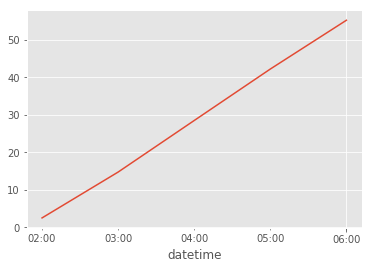

In [162]:
# PACING(SPEND OVER TIME)
df_timestamp[df_timestamp.campaign_id == 3]['campaign_spend'].resample("H").mean().plot()

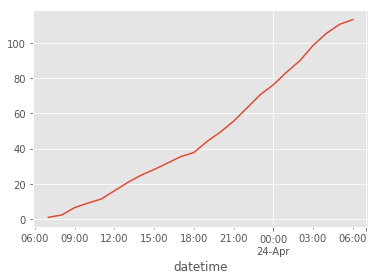

In [163]:
df_timestamp[df_timestamp.campaign_id == 4]['campaign_spend'].resample("H").mean().plot()

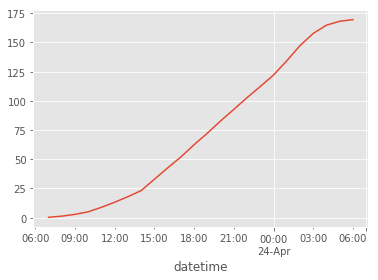

In [164]:
df_timestamp[df_timestamp.campaign_id == 5]['campaign_spend'].resample("H").mean().plot()

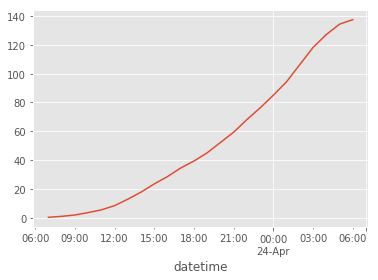

In [165]:
df_timestamp[df_timestamp.campaign_id == 6]['campaign_spend'].resample("H").mean().plot()

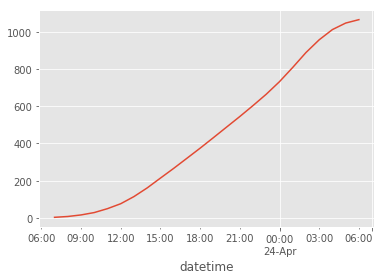

In [166]:
df_timestamp[df_timestamp.campaign_id == 7]['campaign_spend'].resample("H").mean().plot()

## Q6

Q6 NOTE: The rate of seen by users is shown as see_rate in the pivot table. Compared with the video view, app install has a much lower rate of being seen by users. Since app install campaigns are more likely to be displayed very early in the morning, users are less active to scroll down to see more content including the ads. So they have a less seen by users rate. 

In [118]:
trendy = pd.pivot_table(df, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective','hour'],
                   aggfunc = np.sum)
trendx = pd.pivot_table(df_seen, values = 'count', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective','hour'],
                   aggfunc = np.sum)

trendsummary = pd.merge(trendx, trendy, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective','hour'])
trendz = pd.pivot_table(df, values = 'campaign_spend', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective','hour'],
                   aggfunc = np.max)

trendy1 = pd.pivot_table(df, values = 'charged_dummy', index = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective','hour'],
                   aggfunc = np.sum)
trendsummary = pd.merge(trendsummary, trendz, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective','hour'])
trendsummary = pd.merge(trendsummary, trendy1, on = ['campaign_id', 'bid', 'campaign_budget', 'matched_targeting', 'objective','hour'])

In [150]:
trendsummary['seen_rate'] = trendsummary['count_x'] / trendsummary['count_y']
trendsummary['imp_perd'] = trendsummary['count_x'] / trendsummary['campaign_spend']
trendsummary['cpi'] = trendsummary['campaign_spend'] / trendsummary['count_x']
trendsummary['cpo'] = trendsummary['campaign_spend'] / trendsummary['charged_dummy']
trendsummary['charge_perd'] = trendsummary['charged_dummy']/trendsummary['campaign_spend']
trendsummary['egg_rate'] = trendsummary['charged_dummy'] / trendsummary['count_x']

In [151]:
trendsummary

hour  \
bid  campaign_budget matched_targeting                           objective              
7.50 500.00          ['GEO']                                     WEBSITE_CLICKS     9   
                                                                 WEBSITE_CLICKS    10   
                                                                 WEBSITE_CLICKS    11   
                                                                 WEBSITE_CLICKS    12   
1.15 3550.00         ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER'] WEBSITE_CLICKS     0   
                                                                 WEBSITE_CLICKS     1   
                                                                 WEBSITE_CLICKS     2   
                                                                 WEBSITE_CLICKS     3   
                                                                 WEBSITE_CLICKS     4   
                                                                 WEBSITE_CLICKS     5   
                                                                 WEBSITE_CLICKS     6   
                                                                 WEBSITE_CLICKS    10   
                                                                 WEBSITE_CLICKS    11   
                                                                 WEBSITE_CLICKS    12   
                                                                 WEBSITE_CLICKS    13   
                                                                 WEBSITE_CLICKS    14   
                                                                 WEBSITE_CLICKS    15   
                                                                 WEBSITE_CLICKS    16   
                                                                 WEBSITE_CLICKS    17   
                                                                 WEBSITE_CLICKS    18   
                                                                 WEBSITE_CLICKS    19   
                                                                 WEBSITE_CLICKS    20   
                                                                 WEBSITE_CLICKS    21   
                                                                 WEBSITE_CLICKS    22   
                                                                 WEBSITE_CLICKS    23   
1.50 1000.00         ['GEO', 'LANGUAGE']                         APP_INSTALLS       2   
                                                                 APP_INSTALLS       3   
                                                                 APP_INSTALLS       4   
                                                                 APP_INSTALLS       5   
                                                                 APP_INSTALLS       6   
...                                                                               ...   
0.05 138.89          ['GEO', 'AGE_BUCKET']                       VIDEO_VIEWS       18   
                                                                 VIDEO_VIEWS       19   
                                                                 VIDEO_VIEWS       20   
                                                                 VIDEO_VIEWS       21   
                                                                 VIDEO_VIEWS       22   
                                                                 VIDEO_VIEWS       23   
0.50 1075.00         ['GEO']                                     VIDEO_VIEWS        0   
                                                                 VIDEO_VIEWS        1   
                                                                 VIDEO_VIEWS        2   
                                                                 VIDEO_VIEWS        3   
                                                                 VIDEO_VIEWS        4   
                                                                 VIDEO_VIEWS        5   
                                                                 VIDEO_VIEWS

In [121]:
trendsummary.reset_index(level = 0, inplace = True)

In [122]:
trendsummary.reset_index(level = 4, inplace = True)

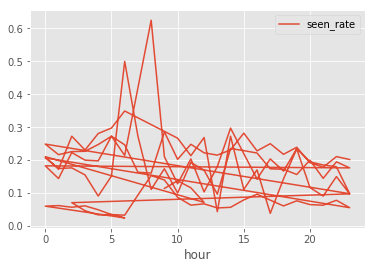

In [123]:
trendsummary.plot(x = 'hour' , y = 'seen_rate')

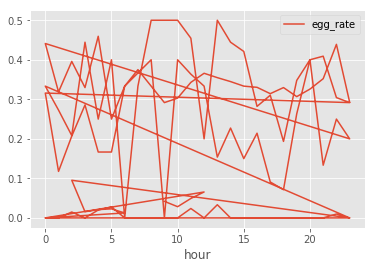

In [152]:
trendsummary.plot(x = 'hour' , y = 'egg_rate')

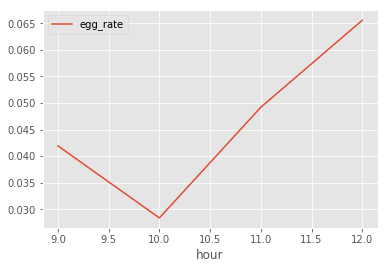

In [153]:
trendsummary[trendsummary.campaign_id == 1].plot(x = 'hour' , y = 'egg_rate')

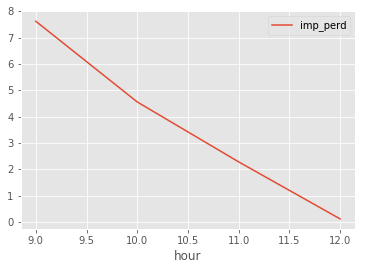

In [160]:
trendsummary[trendsummary.campaign_id == 1].plot(x = 'hour' , y = 'imp_perd')

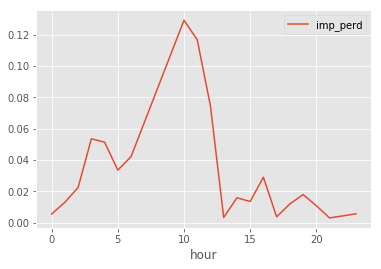

In [161]:
trendsummary[trendsummary.campaign_id == 2].plot(x = 'hour' , y = 'imp_perd')

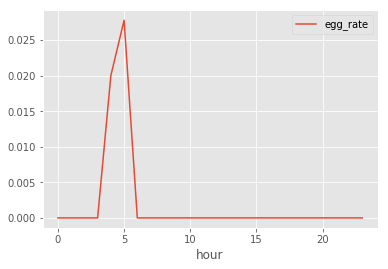

In [154]:
trendsummary[trendsummary.campaign_id == 2].plot(x = 'hour' , y = 'egg_rate', maker = '.')

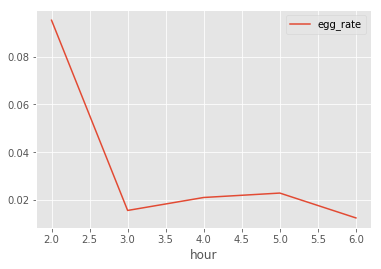

In [155]:
trendsummary[trendsummary.campaign_id == 3].plot(x = 'hour' , y = 'egg_rate')

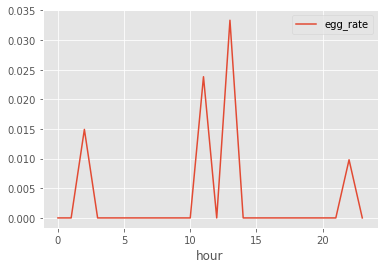

In [156]:
trendsummary[trendsummary.campaign_id == 4].plot(x = 'hour' , y = 'egg_rate')

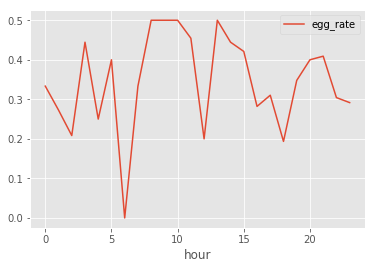

In [157]:
trendsummary[trendsummary.campaign_id == 5].plot(x = 'hour' , y = 'egg_rate')

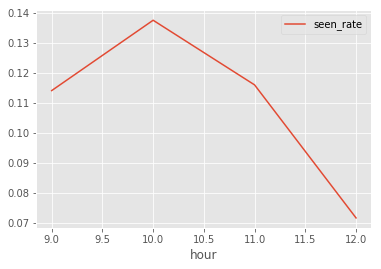

In [124]:
trendsummary[trendsummary.campaign_id == 1].plot(x = 'hour' , y = 'seen_rate')

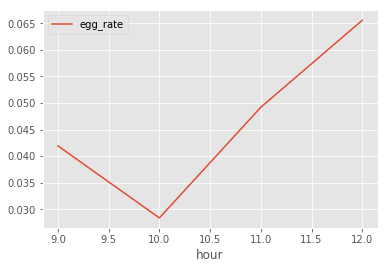

In [169]:
trendsummary[trendsummary.campaign_id == 1].plot(x = 'hour' , y = 'egg_rate')

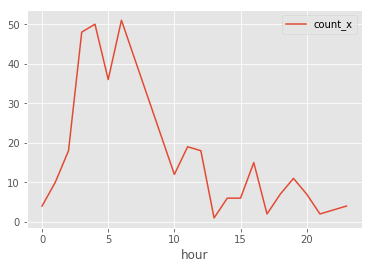

In [172]:
trendsummary[trendsummary.campaign_id == 2].plot(x = 'hour' , y = 'count_x')

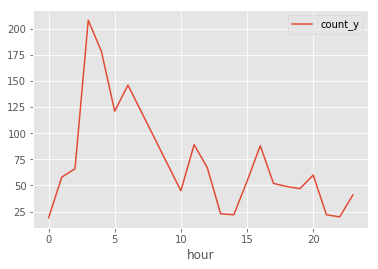

In [173]:
trendsummary[trendsummary.campaign_id == 2].plot(x = 'hour' , y = 'count_y')

In [177]:
trendsummary.groupby['hour'].sum()
# .plot(x = 'hour' , y = 'count_y')

TypeError: 'instancemethod' object has no attribute '__getitem__'

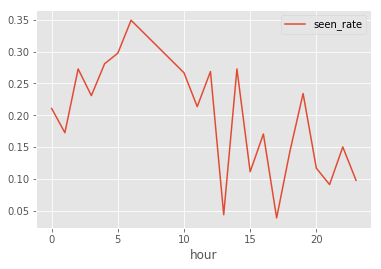

In [170]:
trendsummary[trendsummary.campaign_id == 2].plot(x = 'hour' , y = 'seen_rate')

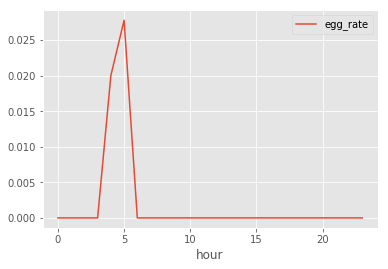

In [171]:
trendsummary[trendsummary.campaign_id == 2].plot(x = 'hour' , y = 'egg_rate')

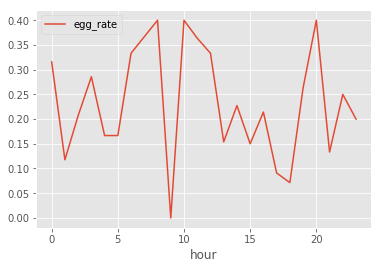

In [158]:
trendsummary[trendsummary.campaign_id == 6].plot(x = 'hour' , y = 'egg_rate')

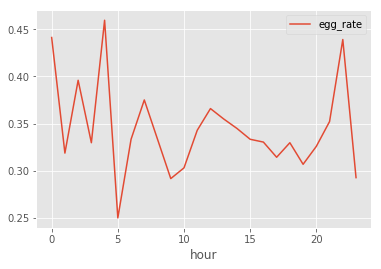

In [159]:
trendsummary[trendsummary.campaign_id == 7].plot(x = 'hour' , y = 'egg_rate')

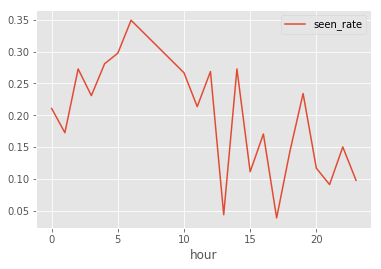

In [125]:
trendsummary[trendsummary.campaign_id == 2].plot(x = 'hour' , y = 'seen_rate')

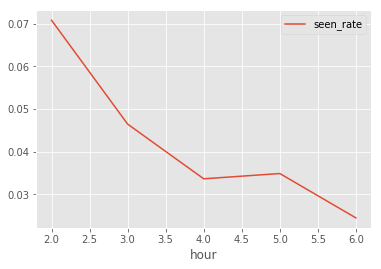

In [126]:
trendsummary[trendsummary.campaign_id == 3].plot(x = 'hour' , y = 'seen_rate')

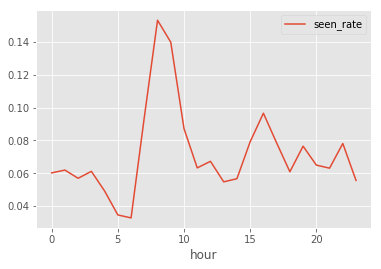

In [127]:
trendsummary[trendsummary.campaign_id == 4].plot(x = 'hour' , y = 'seen_rate')

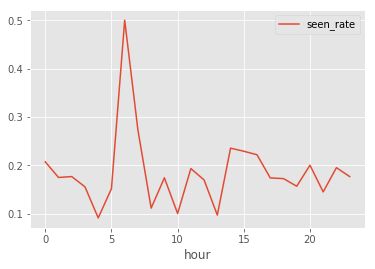

In [128]:
trendsummary[trendsummary.campaign_id == 5].plot(x = 'hour' , y = 'seen_rate')

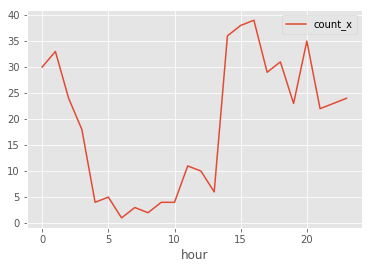

In [129]:
trendsummary[trendsummary.campaign_id == 5].plot(x = 'hour' , y = 'count_x')

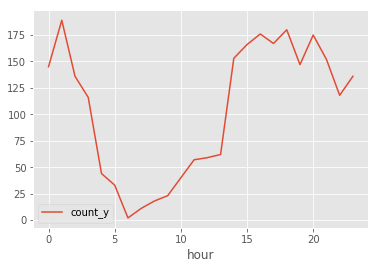

In [130]:
trendsummary[trendsummary.campaign_id == 5].plot(x = 'hour' , y = 'count_y')

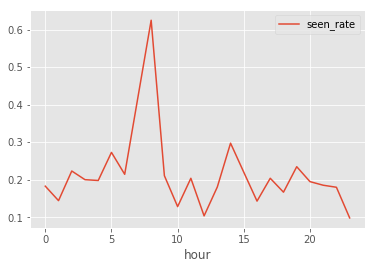

In [131]:
trendsummary[trendsummary.campaign_id == 6].plot(x = 'hour' , y = 'seen_rate')

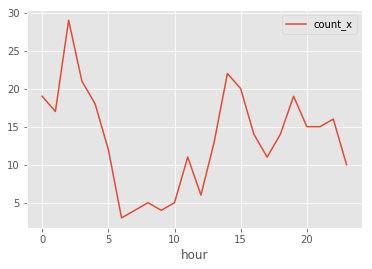

In [132]:
trendsummary[trendsummary.campaign_id == 6].plot(x = 'hour' , y = 'count_x')

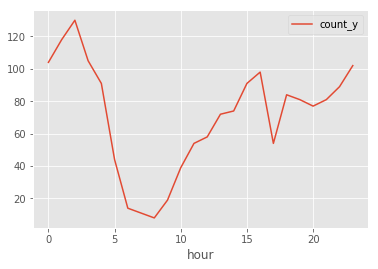

In [133]:
trendsummary[trendsummary.campaign_id == 6].plot(x = 'hour' , y = 'count_y')

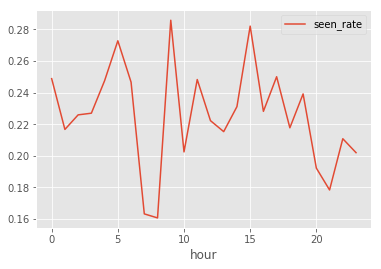

In [134]:
trendsummary[trendsummary.campaign_id == 7].plot(x = 'hour' , y = 'seen_rate')

In [5]:
# Save data
selected_columns = df.columns
data_csv = 'data.csv'
df[selected_columns].to_csv(data_csv, index = False)

In [135]:
# check whether percent seen_by_user is different among different campaigns
df_reg = df[['campaign_id', 'seen_dummy']]
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70317 entries, 0 to 70316
Data columns (total 2 columns):
campaign_id    70317 non-null int64
seen_dummy     70317 non-null int64
dtypes: int64(2)
memory usage: 4.1 MB


In [136]:
df_dummies = pd.get_dummies(df[['campaign_id']], columns = ['campaign_id'])
df_dummies.describe()

campaign_id_1  campaign_id_2  campaign_id_3  campaign_id_4  \
count   70317.000000   70317.000000   70317.000000   70317.000000   
mean        0.365644       0.020976       0.187622       0.252386   
std         0.481614       0.143306       0.390413       0.434384   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       campaign_id_5  campaign_id_6  campaign_id_7  
count   70317.000000   70317.000000   70317.000000  
mean        0.035624       0.024062       0.113685  
std         0.185353       0.153244       0.317431  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000

In [137]:
df_reg = df_reg.join(df_dummies)

In [138]:
df_reg.head()

campaign_id  seen_dummy  campaign_id_1  campaign_id_2  campaign_id_3  \
0            1           0              1              0              0   
1            1           0              1              0              0   
2            1           0              1              0              0   
3            1           0              1              0              0   
4            1           0              1              0              0   

   campaign_id_4  campaign_id_5  campaign_id_6  campaign_id_7  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0

In [3]:
# y = df_reg[1]
# # X = df_reg[2:]
# y
# X

In [4]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# import statsmodels.discrete.discrete_model as sm
# from scipy import stats
# y = df_reg[1]
# X = df_reg[2:]
# X2 = sm.add_constant(X)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())

## Q3

In [46]:
# df['count'] = 1
df['charged_dummy'] = df['charged'] > 0

In [47]:
pd.pivot_table(df, values = 'count', index = ['campaign_id', 'seen_by_user'],
                       columns = ['charged_dummy'], aggfunc = np.sum)

charged_dummy               False  True 
campaign_id seen_by_user                
1           False         22534.0    5.0
            True           3055.0  117.0
2           False          1145.0    NaN
            True            328.0    2.0
3           False         12713.0    4.0
            True            468.0    8.0
4           False         16595.0    NaN
            True           1148.0    4.0
5           False          2049.0    1.0
            True            302.0  153.0
6           False          1373.0    NaN
            True            249.0   70.0
7           False          6176.0    2.0
            True           1186.0  630.0

In [48]:
df[(df.seen_by_user == False) & (df.charged_dummy == True)]

datetime  campaign_id  campaign_spend  \
1742   2018-04-23 09:22:31.510440            1       11.962078   
16816  2018-04-23 11:01:01.288520            1      336.653857   
18542  2018-04-23 11:08:55.741480            1      364.239364   
23369  2018-04-23 11:29:28.611560            1      435.464713   
26814  2018-04-23 11:55:14.881160            1      482.965077   
30189  2018-04-23 13:40:23.572000            5       17.775560   
30292  2018-04-23 13:45:16.743000            7      125.137946   
47806  2018-04-24 00:54:23.987000            7      763.538564   
52121  2018-04-24 02:50:56.546000            3        1.602083   
53547  2018-04-24 03:09:52.769000            3       10.669513   
53613  2018-04-24 03:10:32.760000            3       10.772437   
65739  2018-04-24 05:49:44.600000            3       47.111332   

       campaign_budget      matched_targeting       objective   charged  \
1742             500.0                ['GEO']  WEBSITE_CLICKS  0.022555   
16816            500.0                ['GEO']  WEBSITE_CLICKS  0.010000   
18542            500.0                ['GEO']  WEBSITE_CLICKS  0.017334   
23369            500.0                ['GEO']  WEBSITE_CLICKS  0.040176   
26814            500.0                ['GEO']  WEBSITE_CLICKS  0.015775   
30189            170.0  ['GEO', 'AGE_BUCKET']     VIDEO_VIEWS  0.008541   
30292           1075.0                ['GEO']     VIDEO_VIEWS  0.011168   
47806           1075.0                ['GEO']     VIDEO_VIEWS  0.018393   
52121           1000.0    ['GEO', 'LANGUAGE']    APP_INSTALLS  0.010000   
53547           1000.0    ['GEO', 'LANGUAGE']    APP_INSTALLS  0.019438   
53613           1000.0    ['GEO', 'LANGUAGE']    APP_INSTALLS  0.012455   
65739           1000.0    ['GEO', 'LANGUAGE']    APP_INSTALLS  0.030571   

       seen_by_user  bid  count  charged_dummy  
1742          False  7.5      1           True  
16816         False  7.5      1           True  
18542         False  7.5      1           True  
23369         False  7.5      1           True  
26814         False  7.5      1           True  
30189         False  0.5      1           True  
30292         False  0.5      1           True  
47806         False  0.5      1           True  
52121         False  1.5      1           True  
53547         False  1.5      1           True  
53613         False  1.5      1           True  
65739         False  1.5      1           True

In [49]:
df[(df.seen_by_user == False) & (df.charged_dummy == True) & (df.campaign_id == 1)]

datetime  campaign_id  campaign_spend  \
1742   2018-04-23 09:22:31.510440            1       11.962078   
16816  2018-04-23 11:01:01.288520            1      336.653857   
18542  2018-04-23 11:08:55.741480            1      364.239364   
23369  2018-04-23 11:29:28.611560            1      435.464713   
26814  2018-04-23 11:55:14.881160            1      482.965077   

       campaign_budget matched_targeting       objective   charged  \
1742             500.0           ['GEO']  WEBSITE_CLICKS  0.022555   
16816            500.0           ['GEO']  WEBSITE_CLICKS  0.010000   
18542            500.0           ['GEO']  WEBSITE_CLICKS  0.017334   
23369            500.0           ['GEO']  WEBSITE_CLICKS  0.040176   
26814            500.0           ['GEO']  WEBSITE_CLICKS  0.015775   

       seen_by_user  bid  count  charged_dummy  
1742          False  7.5      1           True  
16816         False  7.5      1           True  
18542         False  7.5      1           True  
23369         False  7.5      1           True  
26814         False  7.5      1           True

### Q4

In [ ]:
# impression per dollar
